## Iris 품종분류  
a. Iris의 품종의 측정 데이터 존재
- setosa, versicolor, virginica
- (꽃잎)pertal length, petal width
- (꽃받침) sepal length, sepal width

b. 품종별 측정데이터를 이용해 새로 채집한 iris의 품종을 예측하는 ML 모델을 제작  
c. 품종별 측정데이터가 이미 존재하므로 지도학습(supervised learning)  
d. 3개의 품종 중 하나를 예측하는 문제이므로 분류(classification) 문제  
e. 입력 특성값을 feature(4개), 결과값을 class(3개의 class) 라 함  
f. 한 개의 꽃에 대한 측정값(sample)을 한 개의 품종으로 출력, 이 때 출력값(품종)을 Label 이라 함

In [1]:
from sklearn.datasets import load_iris # Iris 데이터를 scikit-learn에서 기본제공함

In [2]:
iris_dataset = load_iris();

In [3]:
print(iris_dataset.keys());

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [18]:
print(iris_dataset['DESCR'][:500]);

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                



In [20]:
print(iris_dataset['target_names']);

['setosa' 'versicolor' 'virginica']


In [17]:
print(iris_dataset['feature_names']);

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [27]:
print(iris_dataset['data'][:10]); # 총 150개가 있음
print(type(iris_dataset['data']));
print(iris_dataset['data'].shape);

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
<class 'numpy.ndarray'>
(150, 4)


In [26]:
print(iris_dataset['target']); # 품종 0 1 2
print(iris_dataset['target'].shape);

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(150,)


## 성과 측정  
a. 머신러닝 모델을 구축해 새로운 데이터의 품종을 예측해야 함  
b. 훈련데이터는 평가에 사용할 수 없음(모델이 훈련하는 동안 데이터를 기억함)  
c. 150개의 sample을 training set 과 test set으로 나누어야 함  
- scikit-learn의 train_test_split 함수를 사용하여 데이터를 나눔  
- 데이터는 대문자 X, 레이블을 소문자 y로 표기  
- train_test_split 함수의 test_size 값을 0.0 ~ 1.0 사이로 지정할 수 있음, 지정하지 않으면 train set = 0.75, test set = 0.25로 기본 지정됨  
- random_state 값은 랜덤 seed(0 ~ 42)

In [28]:
from sklearn.model_selection import train_test_split

# 훈련용 75% 실전용 25% 알아서 나눠줌
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0); # random_state는 옵션

In [29]:
print(X_test.shape);
print(y_test.shape);

(38, 4)
(38,)


In [30]:
print(X_train.shape);
print(y_train.shape);

(112, 4)
(112,)


In [31]:
import pandas as pd
import mglearn
import matplotlib.pyplot as plt

In [35]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names);
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3


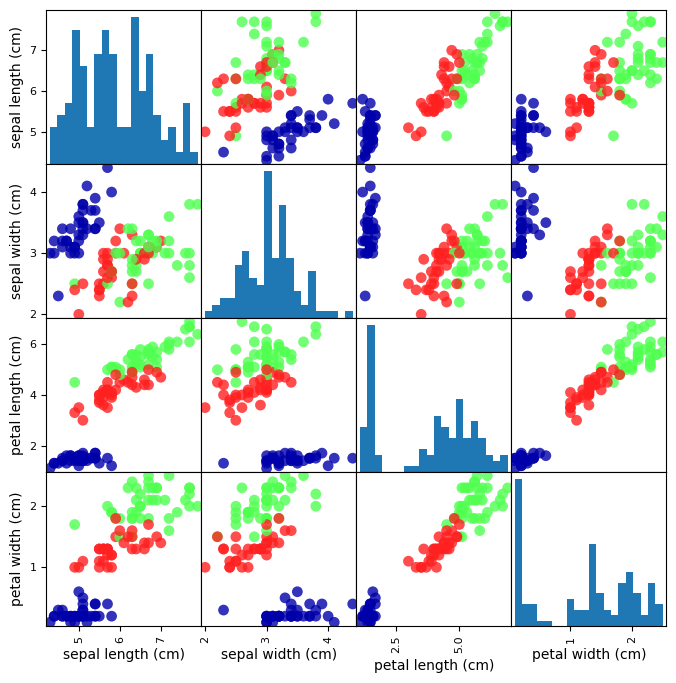

In [39]:
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(8,8), 
                           marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8, 
                           cmap=mglearn.cm3);
plt.show();

### k-최근접 이웃 알고리즘(k-Nearest Neighbors, k-NN)  
- 훈련 데이터를 저장하여 생성  
- 새로운 데이터에 대한 예측은 가장 가까운 훈련 데이터의 포인트를 찾아서 결정  
- 훈련데이터에서 새로운 데이터 포인트에 가장 가까운 k개의 이웃을 찾음  
- 위에서 찾은 이웃들의 클래스 중 빈도가 가장 높은 클래스를 예측값으로 사용(자세한 내용은 2장에서), 이 예제에서는 하나의 이웃만 사용

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1); # 이웃을 한개만 찾겠다는뜻

In [42]:
# 이웃 알고리즘 실행
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [43]:
import numpy as np

In [45]:
X_new = np.array([[5, 2.9, 1, 0.2]]); # sample이 하나지만 반드시 2차원배열로 주어야함
print(X_new.shape);

(1, 4)


In [46]:
prediction = knn.predict(X_new);
print(prediction);

[0]


In [47]:
print(iris_dataset['target_names'][prediction]);

['setosa']


### 모델평가

In [49]:
y_pred = knn.predict(X_test);
print(y_pred);

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [50]:
print('test accuracy: {:.2f}'.format(np.mean(y_pred == y_test))); # 같으면 1 다르면 0으로 했을때 mean으로 평균을 내본것

test accuracy: 0.97


In [51]:
# 요약

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0);

knn = KNeighborsClassifier(n_neighbors=1);
knn.fit(X_train, y_train)
print('test accuracy: {:.2f}'.format(np.mean(y_pred == y_test)));

test accuracy: 0.97
